#### Optimum learning rate

In [8]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Flatten, InputLayer
from sklearn.preprocessing import LabelEncoder
from tensorflow.python.keras import utils
import keras
import tensorflow as tf
import imageio 
from PIL import Image 
import keras_lr_finder as lr_find # For finding optimum learning rate [pip install keras_lr_finder]

In [6]:
# Reading the data
train = pd.read_csv('age_detection_train/train.csv')

# Image resizing of test data into single numpy array
temp = []
for img_name in train.ID:
    img_path = os.path.join('age_detection_train/Train', img_name)
    img = imageio.imread(img_path)
    img = np.array(Image.fromarray(img).resize((32, 32))).astype('float32')    
    temp.append(img)

train_x = np.stack(temp)

# Normalizing the images
train_x = train_x / 255.

# Encoding the categorical variable to numeric
lb = LabelEncoder()
train_y = lb.fit_transform(train.Class)
train_y = utils.np_utils.to_categorical(train_y)

In [30]:
# Specifying all the parameters we will be using in our network
input_num_units = (32, 32, 3)
hidden_num_units = 500
output_num_units = 3

epochs = 100
batch_size = 512

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=input_num_units), # Perform conversion of higher dimensional data (here, 2-D) to 1-D data.
    keras.layers.Dense(hidden_num_units, activation=tf.nn.relu), # Hidden layer with 500 neurons and ReLU activation function
    keras.layers.Dense(output_num_units, activation=tf.nn.softmax) # Output layer with softmax activation function 
])                                                   # which gives final output in terms of probability. 

In [19]:
# Defining parameters like optmizer, loss function and evaluating metric
model.compile(loss='categorical_crossentropy', # 
              optimizer=keras.optimizers.Adam(), # Learning rate and momentum can be passed inside optimizer
              metrics=['accuracy'])

In [26]:
lr_finder = lr_find.LRFinder(model)

# Training can stop abruptly if rate is set too high. In such cases, reduce the value of end_lr. 
lr_finder.find(train_x, train_y, start_lr=0.0001, end_lr=0.09, batch_size=batch_size, epochs=epochs)

Epoch 1/100
19906/19906 [==============================] - 18s 898us/step - loss: 0.7053 - acc: 0.6935
Epoch 2/100
19906/19906 [==============================] - 16s 828us/step - loss: 0.6893 - acc: 0.7023
Epoch 3/100
19906/19906 [==============================] - 18s 921us/step - loss: 0.6874 - acc: 0.7034
Epoch 4/100
19906/19906 [==============================] - 18s 924us/step - loss: 0.6867 - acc: 0.7047
Epoch 5/100
19906/19906 [==============================] - 18s 917us/step - loss: 0.6842 - acc: 0.7033
Epoch 6/100
19906/19906 [==============================] - 19s 960us/step - loss: 0.6825 - acc: 0.7066
Epoch 7/100
19906/19906 [==============================] - 23s 1ms/step - loss: 0.6822 - acc: 0.7059
Epoch 8/100
19906/19906 [==============================] - 19s 957us/step - loss: 0.6806 - acc: 0.7064
Epoch 9/100
19906/19906 [==============================] - 19s 932us/step - loss: 0.6801 - acc: 0.7090
Epoch 10/100
19906/19906 [==============================] - 20s 1ms/step - 

19906/19906 [==============================] - 16s 817us/step - loss: 0.7259 - acc: 0.6741
Epoch 81/100
19906/19906 [==============================] - 19s 961us/step - loss: 0.7582 - acc: 0.6557
Epoch 82/100
19906/19906 [==============================] - 17s 843us/step - loss: 0.7572 - acc: 0.6589
Epoch 83/100
19906/19906 [==============================] - 17s 835us/step - loss: 0.7288 - acc: 0.6754
Epoch 84/100
19906/19906 [==============================] - 18s 885us/step - loss: 0.7898 - acc: 0.6351
Epoch 85/100
19906/19906 [==============================] - 18s 905us/step - loss: 0.7984 - acc: 0.6307
Epoch 86/100
19906/19906 [==============================] - 17s 842us/step - loss: 0.8249 - acc: 0.6146
Epoch 87/100
19906/19906 [==============================] - 16s 796us/step - loss: 0.8405 - acc: 0.6201
Epoch 88/100
12800/19906 [==================>...........] - ETA: 6s - loss: 0.9231 - acc: 0.5841

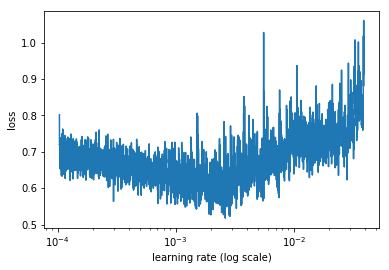

In [27]:
# Plot the loss, ignore 20 batches in the beginning and 5 in the end
lr_finder.plot_loss(n_skip_beginning=20, n_skip_end=5)

#### From the above figure following learning rate can be choosen due to fast decrease in loss -
* base_lr = $10^{-4}$
* max_lr = $10^{-3}$

## Setting cyclic learning rate for model training
Ensure you have `clr_callback.py` file in the same directory of current module

In [14]:
from clr_callback import * # Importing cyclic learning rate module

In [28]:
# Pass the values of base_lr with the value of 
cb_triangular = CyclicLR(base_lr=0.0001, max_lr=0.001, step_size=2000., mode='triangular2') # Setting callback for model

# Writing graph will take time. Hence, keeping it False.
cb_save = keras.callbacks.TensorBoard(log_dir='learning_rate', write_graph=False)

In [31]:
model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs, 
          validation_split=0.2, callbacks=[cb_triangular, cb_save], verbose=1)
print('Model built sucessfully.')

Train on 15924 samples, validate on 3982 samples
Epoch 1/100
15924/15924 [==============================] - 10s 640us/step - loss: 0.6899 - acc: 0.7000 - val_loss: 0.6773 - val_acc: 0.7082
Epoch 2/100
15924/15924 [==============================] - 9s 593us/step - loss: 0.6884 - acc: 0.7008 - val_loss: 0.6762 - val_acc: 0.7094
Epoch 3/100
15924/15924 [==============================] - 12s 747us/step - loss: 0.6882 - acc: 0.7021 - val_loss: 0.6766 - val_acc: 0.7104
Epoch 4/100
15924/15924 [==============================] - 11s 669us/step - loss: 0.6847 - acc: 0.7038 - val_loss: 0.6761 - val_acc: 0.7077
Epoch 5/100
15924/15924 [==============================] - 8s 498us/step - loss: 0.6841 - acc: 0.7051 - val_loss: 0.6740 - val_acc: 0.7074
Epoch 6/100
15924/15924 [==============================] - 8s 503us/step - loss: 0.6830 - acc: 0.7058 - val_loss: 0.6759 - val_acc: 0.7140
Epoch 7/100
15924/15924 [==============================] - 9s 541us/step - loss: 0.6825 - acc: 0.7081 - val_loss: 

15924/15924 [==============================] - 7s 449us/step - loss: 0.5527 - acc: 0.7702 - val_loss: 0.6672 - val_acc: 0.7175
Epoch 60/100
15924/15924 [==============================] - 10s 598us/step - loss: 0.5730 - acc: 0.7521 - val_loss: 0.6681 - val_acc: 0.7145
Epoch 61/100
15924/15924 [==============================] - 9s 572us/step - loss: 0.5470 - acc: 0.7757 - val_loss: 0.6966 - val_acc: 0.7057
Epoch 62/100
15924/15924 [==============================] - 9s 567us/step - loss: 0.5452 - acc: 0.7756 - val_loss: 0.7644 - val_acc: 0.6725
Epoch 63/100
15924/15924 [==============================] - 10s 631us/step - loss: 0.5626 - acc: 0.7644 - val_loss: 0.6760 - val_acc: 0.7125
Epoch 64/100
15924/15924 [==============================] - 10s 652us/step - loss: 0.5399 - acc: 0.7797 - val_loss: 0.6722 - val_acc: 0.7115
Epoch 65/100
15924/15924 [==============================] - 11s 713us/step - loss: 0.5358 - acc: 0.7776 - val_loss: 0.7047 - val_acc: 0.6989
Epoch 66/100
15924/15924 [===

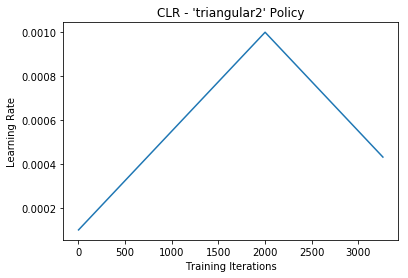

In [32]:
plt.xlabel('Training Iterations')
plt.ylabel('Learning Rate')
plt.title("CLR - 'triangular2' Policy")
plt.plot(cb_triangular.history['iterations'], cb_triangular.history['lr'])

# With more number of iterations the graph will correspond to that of a traingular wave